<a href="https://colab.research.google.com/github/Attachai-S/cp372-125PN-131AS-132AY/blob/main/cp372_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Download data**

##**About dataset**
[This dataset](https://www.kaggle.com/datasets/airbnb/seattle/) Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Seattle, WA.

<br>

Dataset source : https://www.kaggle.com/datasets/airbnb/seattle/

**import library**

In [64]:
# for prepare data to visualization
import kagglehub
import os
import pandas as pd
# for prepare data to create regression model
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler

In [ ]:
# Download latest version dataset
path = kagglehub.dataset_download("airbnb/seattle")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/seattle


In [ ]:
#check files from path
extract_path_file = !ls {path}

#extract each file to path
file_name = []
for csv_name in extract_path_file[0].split(" "):
  if csv_name != "" :
    file_name.append(os.path.join(path, csv_name))

file_name


['/kaggle/input/seattle/calendar.csv',
 '/kaggle/input/seattle/listings.csv',
 '/kaggle/input/seattle/reviews.csv']

#**Data preparation**

##**Explore raw data**

###Explore **calendar.csv**

In [ ]:
Carlendar = file_name[0]# calendar.csv
CarlendarDf = pd.read_csv(Carlendar)
CarlendarDf.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [ ]:
CarlendarDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [ ]:
CarlendarDf.shape

(1393570, 4)

###Explore **listings.csv**

In [ ]:
Listings = file_name[1]# listings.csv
ListingsDf = pd.read_csv(Listings)
ListingsDf.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [ ]:
ListingsDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [ ]:
ListingsDf.shape

(3818, 92)

###Explore **reviews.csv**

In [ ]:
Reviews = file_name[2]# reviews.csv
ReviewsDf = pd.read_csv(Reviews)
ReviewsDf.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [ ]:
ReviewsDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [ ]:
ReviewsDf.shape

(84849, 6)

##Data cleaning

###**Data Cleaning for calendar.csv**

check null

In [ ]:
total_null_vals = CarlendarDf.isnull().sum()
null_val_percent = (total_null_vals/ len(CarlendarDf)) * 100
null_val_percent

,0
listing_id,0.000000
date,0.000000
available,0.000000
price,32.938998


Drop column **"price"**

In [ ]:
CarlendarDf.drop(columns=['price'], inplace=True)

In [ ]:
total_null_vals = CarlendarDf.isnull().sum()
null_val_percent = (total_null_vals/ len(CarlendarDf)) * 100
null_val_percent

,0
listing_id,0.0
date,0.0
available,0.0


###**Data cleaning for listing.csv**

In [ ]:
total_null_vals = ListingsDf.isnull().sum()
null_val_percent = (total_null_vals/ len(ListingsDf)) * 100
null_val_percent

,0
id,0.000000
listing_url,0.000000
scrape_id,0.000000
last_scraped,0.000000
name,0.000000
...,...
cancellation_policy,0.000000
require_guest_profile_picture,0.000000
require_guest_phone_verification,0.000000
calculated_host_listings_count,0.000000


Dropping Unncessary Columns

In [ ]:
ListingsDf.drop(columns=['listing_url', 'scrape_id', 'last_scraped', 'summary','experiences_offered','space', 'description',
                      'notes', 'transit', 'thumbnail_url', 'medium_url','picture_url','host_about','host_location',
                      'smart_location', 'xl_picture_url', 'host_url','host_thumbnail_url','country_code', 'country',
                      'host_picture_url','host_has_profile_pic','host_response_rate','host_is_superhost',
                      'host_neighbourhood','host_verifications','bed_type','neighbourhood',
                      'calendar_updated','calendar_last_scraped', "neighborhood_overview",'jurisdiction_names',"host_about",
                     "review_scores_accuracy", "review_scores_cleanliness","review_scores_checkin",
                      "review_scores_communication", "review_scores_location","review_scores_value",'reviews_per_month',
                      'requires_license','is_location_exact',
], inplace=True)

Drop Columns with High Percentage of Missing Values:

In [ ]:
ListingsDf.drop(columns=['license', "square_feet","weekly_price","monthly_price"], inplace=True)

Numeric Columns: Filling null values

In [ ]:
ListingsDf['security_deposit'].fillna(value = '$0.00', inplace = True)
ListingsDf['cleaning_fee'].fillna(value = '$0.00', inplace = True)
ListingsDf['host_listings_count'].fillna(ListingsDf['host_listings_count'].mean(), inplace=True)
ListingsDf['host_total_listings_count'].fillna(ListingsDf['host_total_listings_count'].mean(), inplace=True)
ListingsDf['review_scores_rating'].fillna(ListingsDf['review_scores_rating'].mean(), inplace=True)

<ipython-input-108-e0ef4f4e4cd8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ListingsDf['security_deposit'].fillna(value = '$0.00', inplace = True)
<ipython-input-108-e0ef4f4e4cd8>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

Categorical Columns: Filling null values for valid categorical columns with Unknown

In [ ]:
ListingsDf['host_response_time'].fillna(value = 'Unknown', inplace = True)
ListingsDf['host_acceptance_rate'].fillna(value = 'Unknown', inplace = True)

cat_null_to_mode = ['property_type','bathrooms','bedrooms','beds']
for column in cat_null_to_mode:
    ListingsDf[column].fillna(ListingsDf[column].mode()[0], inplace=True)

<ipython-input-109-ceb7540e85b6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ListingsDf['host_response_time'].fillna(value = 'Unknown', inplace = True)
<ipython-input-109-ceb7540e85b6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

Datetime Columns:

1) Filling host_since null values with mode

2) Dropping first_review and last_review columns

In [ ]:
ListingsDf['host_since'].fillna(ListingsDf['host_since'].mode()[0], inplace = True)
ListingsDf.drop(columns=['first_review', 'last_review'], inplace=True)

<ipython-input-110-e43acc3d8b63>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ListingsDf['host_since'].fillna(ListingsDf['host_since'].mode()[0], inplace = True)


Boolean Columns: Filling null values with False

In [ ]:
ListingsDf['host_identity_verified'].fillna(False, inplace = True)

<ipython-input-111-6ef8acfdc0df>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ListingsDf['host_identity_verified'].fillna(False, inplace = True)


Crucial identifier missing:

Dropping Host_name rows having null values

In [ ]:
ListingsDf.dropna(subset=['host_name'], inplace=True)

Handling zipcode null values as it is crucial

In [ ]:
rows_with_null_zipcode = ListingsDf[ListingsDf['zipcode'].isnull()]
rows_with_null_zipcode

,id,name,host_id,host_name,host_since,host_response_time,host_acceptance_rate,host_listings_count,host_total_listings_count,host_identity_verified,...,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
162,2039149,Walkable Seattle 3-bedroom Home,5325329,Blair,2013-03-04,within a few hours,100%,9.0,9.0,t,...,42,58,124,121,91.000000,t,strict,f,f,8
479,610989,Inn of Twin Gables - North Room,3029318,Katie,2012-07-23,Unknown,Unknown,1.0,1.0,t,...,0,0,2,1,100.000000,f,strict,f,f,1
988,4172364,Blue Room,21649497,Jerome,2014-09-22,within an hour,100%,4.0,4.0,t,...,60,90,365,33,97.000000,f,flexible,f,f,4
1672,8355276,Downtown studio close to everything,22049520,Rilwan,2014-10-02,within an hour,100%,1.0,1.0,t,...,23,42,42,14,87.000000,t,flexible,f,f,1
1917,2134911,The Studio at Mibbett Hollow - Boat,4122018,Lynne,2012-11-11,within an hour,Unknown,3.0,3.0,t,...,60,90,365,5,92.000000,f,strict,t,t,2
2521,2332949,Centrally located Roanoke Park home,640731,Dan And Natalia,2011-05-29,within an hour,100%,1.0,1.0,t,...,60,90,347,38,95.000000,f,strict,f,f,1
2671,9774404,Bohemian Studio in Capitol Hill,18746557,Amanda,2014-07-23,Unknown,Unknown,1.0,1.0,f,...,0,0,7,0,94.539262,f,flexible,f,f,1


In [ ]:
ListingsDf.at[162, 'zipcode'] = 98107
ListingsDf.at[479, 'zipcode'] = 98119
ListingsDf.at[988, 'zipcode'] = 98122
ListingsDf.at[1672, 'zipcode'] = 98101
ListingsDf.at[1917, 'zipcode'] = 98199
ListingsDf.at[2521, 'zipcode'] = 98102
ListingsDf.at[2671, 'zipcode'] = 98102
ListingsDf.reset_index(drop=True, inplace=True)

recheck null

In [ ]:
total_null_vals = ListingsDf.isnull().sum()
null_val_percent = (total_null_vals/ len(ListingsDf)) * 100
null_val_percent

,0
id,0.0
name,0.0
host_id,0.0
host_name,0.0
host_since,0.0
host_response_time,0.0
host_acceptance_rate,0.0
host_listings_count,0.0
host_total_listings_count,0.0
host_identity_verified,0.0


In [ ]:
# prompt: ListingsDf in column 'host_acceptance_rate' contains "100%" and "unknow", please remove"%" in "100%"

ListingsDf['host_acceptance_rate'] = ListingsDf['host_acceptance_rate'].str.replace('%', '', regex=False)

In [ ]:
ListingsDf['state'].replace('wa', 'WA', inplace=True)
ListingsDf['amenities'] = ListingsDf['amenities'].str.replace('[{}""]', '', regex=True)
ListingsDf['security_deposit'] = pd.to_numeric(ListingsDf['security_deposit'].str.replace('[\$,]', '', regex=True), errors='coerce')
ListingsDf['price'] = pd.to_numeric(ListingsDf['price'].str.replace('[\$,]', '', regex=True), errors='coerce')
ListingsDf['cleaning_fee'] = pd.to_numeric(ListingsDf['cleaning_fee'].str.replace('[\$,]', '', regex=True), errors='coerce')
ListingsDf['extra_people'] = pd.to_numeric(ListingsDf['extra_people'].str.replace('[\$,]', '', regex=True), errors='coerce')
ListingsDf['host_acceptance_rate'] = ListingsDf['host_acceptance_rate'].str.replace('%', '', regex=False)

<ipython-input-117-e24f424b291a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ListingsDf['state'].replace('wa', 'WA', inplace=True)


In [ ]:
bool_cols = [
    'host_identity_verified', 'has_availability', 'instant_bookable',
    'require_guest_profile_picture', 'require_guest_phone_verification'
]
for col in bool_cols:
    ListingsDf[col] = ListingsDf[col].map({'t': True, 'f': False})

In [ ]:
ListingsDf['city'].replace('seattle','Seattle', inplace=True)

<ipython-input-132-26de05ed98fd>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ListingsDf['city'].replace('seattle','Seattle', inplace=True)
<ipython-input-132-26de05ed98fd>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

In [ ]:
ListingsDf['city'].unique()

array(['Seattle', 'Ballard, Seattle', 'West Seattle', 'Seattle ',
       'Phinney Ridge Seattle'], dtype=object)

In [ ]:
ListingsDf = ListingsDf[ListingsDf['city'] != "西雅图"]

recheck data

In [ ]:
ListingsDf.head()

,id,name,host_id,host_name,host_since,host_response_time,host_acceptance_rate,host_listings_count,host_total_listings_count,host_identity_verified,...,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,host_duration_years,price_per_person,availability_ratio
0,241032,Stylish Queen Anne Apartment,956883,Maija,2011-08-11,within a few hours,100,3.0,3.0,True,...,207,95.000000,False,moderate,False,False,2,13,21.250000,0.947945
1,953595,Bright & Airy Queen Anne Apartment,5177328,Andrea,2013-02-21,within an hour,100,6.0,6.0,True,...,43,96.000000,False,strict,True,True,6,12,37.500000,0.797260
2,3308979,New Modern House-Amazing water view,16708587,Jill,2014-06-12,within a few hours,100,2.0,2.0,True,...,20,97.000000,False,strict,False,False,2,10,88.636364,0.602740
3,7421966,Queen Anne Chateau,9851441,Emily,2013-11-06,Unknown,Unknown,1.0,1.0,True,...,0,94.539262,False,flexible,False,False,1,11,33.333333,0.391781
4,278830,Charming craftsman 3 bdm house,1452570,Emily,2011-11-29,within an hour,Unknown,2.0,2.0,True,...,38,92.000000,False,strict,False,False,1,13,75.000000,1.000000


###**Data cleaning for reviews.csv**

In [ ]:
total_null_vals = ReviewsDf.isnull().sum()
null_val_percent = (total_null_vals/ len(ReviewsDf)) * 100
null_val_percent

,0
listing_id,0.000000
id,0.000000
date,0.000000
reviewer_id,0.000000
reviewer_name,0.000000
comments,0.021214


Dropping unnecessary column

In [ ]:
ReviewsDf.drop(columns=['comments'], inplace=True)

recheck null

In [ ]:
total_null_vals = ReviewsDf.isnull().sum()
null_val_percent = (total_null_vals/ len(ReviewsDf)) * 100
null_val_percent

,0
listing_id,0.0
id,0.0
date,0.0
reviewer_id,0.0
reviewer_name,0.0


##**Feature engineering**

All new feature will create in **listing.csv**

###create **host_duration_years**

In [ ]:
ListingsDf['host_since'] = pd.to_datetime(ListingsDf['host_since'])
ListingsDf['host_duration_years'] = (pd.to_datetime('today') - ListingsDf['host_since']).dt.days // 365

###create **price_per_person**

In [ ]:
ListingsDf['price_per_person'] = ListingsDf['price'] / ListingsDf['accommodates']

###create **availability_ratio**

In [ ]:
ListingsDf['availability_ratio'] = ListingsDf['availability_365'] / 365.0

In [ ]:
ListingsDf.head()

,id,name,host_id,host_name,host_since,host_response_time,host_acceptance_rate,host_listings_count,host_total_listings_count,host_identity_verified,...,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,host_duration_years,price_per_person,availability_ratio
0,241032,Stylish Queen Anne Apartment,956883,Maija,2011-08-11,within a few hours,100,3.0,3.0,True,...,207,95.000000,False,moderate,False,False,2,13,21.250000,0.947945
1,953595,Bright & Airy Queen Anne Apartment,5177328,Andrea,2013-02-21,within an hour,100,6.0,6.0,True,...,43,96.000000,False,strict,True,True,6,12,37.500000,0.797260
2,3308979,New Modern House-Amazing water view,16708587,Jill,2014-06-12,within a few hours,100,2.0,2.0,True,...,20,97.000000,False,strict,False,False,2,10,88.636364,0.602740
3,7421966,Queen Anne Chateau,9851441,Emily,2013-11-06,Unknown,Unknown,1.0,1.0,True,...,0,94.539262,False,flexible,False,False,1,11,33.333333,0.391781
4,278830,Charming craftsman 3 bdm house,1452570,Emily,2011-11-29,within an hour,Unknown,2.0,2.0,True,...,38,92.000000,False,strict,False,False,1,13,75.000000,1.000000


##**Download cleaned data**

for Tablueau analysis


In [ ]:
# Check if the directory exists, create it if it doesn't
cleaned_data_dir = 'cleaned_data'
if not os.path.exists(cleaned_data_dir):
    os.makedirs(cleaned_data_dir)

# Save the dataframes to CSV files
CarlendarDf.to_csv(os.path.join(cleaned_data_dir, 'calendar.csv'), index=False)
ListingsDf.to_csv(os.path.join(cleaned_data_dir, 'listing.csv'), index=False)
ReviewsDf.to_csv(os.path.join(cleaned_data_dir, 'reviews.csv'), index=False)

print(f"Cleaned data saved to the '{cleaned_data_dir}' directory.")

Cleaned data saved to the 'cleaned_data' directory.


#**Create Regression model**

for this part we use **XGBoost Regressor** for prediction, learn more about **XGBoost Regressor** [HERE](https://www.geeksforgeeks.org/xgboost-for-regression/)



In [45]:
cleanedDf = pd.read_csv("cleaned_data/listing.csv")
cleanedDf.head()

,id,name,host_id,host_name,host_since,host_response_time,host_acceptance_rate,host_listings_count,host_total_listings_count,host_identity_verified,...,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,host_duration_years,price_per_person,availability_ratio
0,241032,Stylish Queen Anne Apartment,956883,Maija,2011-08-11,within a few hours,100,3.0,3.0,True,...,207,95.000000,False,moderate,False,False,2,13,21.250000,0.947945
1,953595,Bright & Airy Queen Anne Apartment,5177328,Andrea,2013-02-21,within an hour,100,6.0,6.0,True,...,43,96.000000,False,strict,True,True,6,12,37.500000,0.797260
2,3308979,New Modern House-Amazing water view,16708587,Jill,2014-06-12,within a few hours,100,2.0,2.0,True,...,20,97.000000,False,strict,False,False,2,10,88.636364,0.602740
3,7421966,Queen Anne Chateau,9851441,Emily,2013-11-06,Unknown,Unknown,1.0,1.0,True,...,0,94.539262,False,flexible,False,False,1,11,33.333333,0.391781
4,278830,Charming craftsman 3 bdm house,1452570,Emily,2011-11-29,within an hour,Unknown,2.0,2.0,True,...,38,92.000000,False,strict,False,False,1,13,75.000000,1.000000


In [46]:
cleanedDf['amenities'] = cleanedDf['amenities'].str.replace('[{}]', '')  # Remove curly braces
cleanedDf['amenities'] = cleanedDf['amenities'].str.split(',')  # Split amenities by commas

# Explode the amenities into separate rows
exploded_amenities = cleanedDf['amenities'].explode()

In [ ]:
dummies = pd.get_dummies(cleanedDf['amenities'].explode(), prefix='amenity')
dummies = dummies.astype(int)

# Concatenate
cleanedDf = pd.concat([cleanedDf, dummies.groupby(level=0).max()], axis=1)
cleanedDf.drop('amenities', axis=1, inplace=True)
# cleanedDf.headI(1)

In [51]:
cleanedDf.head(1)

,id,name,host_id,host_name,host_since,host_response_time,host_acceptance_rate,host_listings_count,host_total_listings_count,host_identity_verified,...,amenity_Safety Card,amenity_Shampoo,amenity_Smoke Detector,amenity_Smoking Allowed,amenity_Suitable for Events,amenity_TV,amenity_Washer,amenity_Washer / Dryer,amenity_Wheelchair Accessible,amenity_Wireless Internet
0,241032,Stylish Queen Anne Apartment,956883,Maija,2011-08-11,within a few hours,100,3.0,3.0,True,...,0,0,0,0,0,1,1,0,0,1


In [55]:
le = LabelEncoder()
req_obj_cols = ['neighbourhood_cleansed','property_type', 'room_type']
cleanedDf[req_obj_cols] = cleanedDf[req_obj_cols].apply(lambda col: le.fit_transform(col.astype(str)))

In [56]:
cleanedDf.head(1)

,id,name,host_id,host_name,host_since,host_response_time,host_acceptance_rate,host_listings_count,host_total_listings_count,host_identity_verified,...,amenity_Safety Card,amenity_Shampoo,amenity_Smoke Detector,amenity_Smoking Allowed,amenity_Suitable for Events,amenity_TV,amenity_Washer,amenity_Washer / Dryer,amenity_Wheelchair Accessible,amenity_Wireless Internet
0,241032,Stylish Queen Anne Apartment,956883,Maija,2011-08-11,within a few hours,100,3.0,3.0,True,...,0,0,0,0,0,1,1,0,0,1


In [57]:
host_stats = cleanedDf.groupby('host_name')['price'].agg(['mean', 'median', 'count']).reset_index()

host_stats.columns = ['host_name', 'mean_price', 'median_price', 'listing_count']
host_stats.head()

,host_name,mean_price,median_price,listing_count
0,Aaron,93.5,96.5,8
1,Abby,130.0,140.0,3
2,Abe,56.0,56.0,1
3,Abigail,95.0,95.0,1
4,Abigail & Justin,75.0,75.0,1


In [58]:
cleanedDf = pd.merge(cleanedDf, host_stats, on='host_name', how='left')

<Axes: >

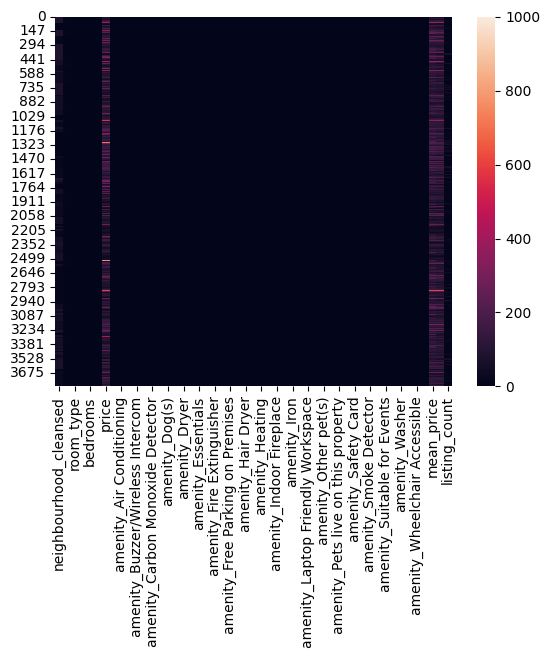

In [62]:
# Independent Variables
for_map = cleanedDf[['neighbourhood_cleansed', 'property_type', 'room_type', 'bathrooms', 'bedrooms', 'beds','price',
            'amenity_24-Hour Check-in', 'amenity_Air Conditioning',
            'amenity_Breakfast', 'amenity_Buzzer/Wireless Intercom',
            'amenity_Cable TV', 'amenity_Carbon Monoxide Detector',
            'amenity_Cat(s)', 'amenity_Dog(s)', 'amenity_Doorman', 'amenity_Dryer',
            'amenity_Elevator in Building', 'amenity_Essentials',
            'amenity_Family/Kid Friendly', 'amenity_Fire Extinguisher',
            'amenity_First Aid Kit', 'amenity_Free Parking on Premises',
            'amenity_Gym', 'amenity_Hair Dryer', 'amenity_Hangers',
            'amenity_Heating', 'amenity_Hot Tub', 'amenity_Indoor Fireplace',
            'amenity_Internet', 'amenity_Iron', 'amenity_Kitchen',
            'amenity_Laptop Friendly Workspace', 'amenity_Lock on Bedroom Door',
            'amenity_Other pet(s)', 'amenity_Pets Allowed',
            'amenity_Pets live on this property', 'amenity_Pool',
            'amenity_Safety Card', 'amenity_Shampoo', 'amenity_Smoke Detector',
            'amenity_Smoking Allowed', 'amenity_Suitable for Events', 'amenity_TV',
            'amenity_Washer', 'amenity_Washer / Dryer',
            'amenity_Wheelchair Accessible', 'amenity_Wireless Internet',
            'mean_price', 'median_price', 'listing_count']]

sns.heatmap(for_map)

In [63]:
for_map.corr()

,neighbourhood_cleansed,property_type,room_type,bathrooms,bedrooms,beds,price,amenity_24-Hour Check-in,amenity_Air Conditioning,amenity_Breakfast,...,amenity_Smoking Allowed,amenity_Suitable for Events,amenity_TV,amenity_Washer,amenity_Washer / Dryer,amenity_Wheelchair Accessible,amenity_Wireless Internet,mean_price,median_price,listing_count
neighbourhood_cleansed,1.000000,0.192873,0.111640,0.034998,0.061188,0.019928,-0.031626,-0.049394,-0.112710,0.060125,...,-0.003630,0.025032,-0.079568,-0.029058,0.007721,-0.090939,0.035459,-0.064498,-0.062442,-0.046606
property_type,0.192873,1.000000,0.273205,0.243503,0.285784,0.164043,0.045417,-0.040896,-0.090946,0.038538,...,0.042255,0.075779,-0.081589,-0.020446,-0.002116,-0.183499,0.050045,-0.027137,-0.054997,-0.088283
room_type,0.111640,0.273205,1.000000,-0.099136,-0.235102,-0.344111,-0.429893,-0.107379,-0.079249,0.189216,...,0.076976,0.066211,-0.259412,-0.041606,-0.015445,-0.099391,-0.022011,-0.335921,-0.349330,0.042259
bathrooms,0.034998,0.243503,-0.099136,1.000000,0.610747,0.532139,0.516250,0.012662,0.057627,-0.010467,...,0.002441,0.121848,0.130855,0.142610,-0.010047,-0.041887,0.045719,0.321043,0.290943,0.046878
bedrooms,0.061188,0.285784,-0.235102,0.610747,1.000000,0.753159,0.627973,0.013522,0.037569,-0.069974,...,-0.039383,0.077154,0.184695,0.173168,0.004988,-0.041998,0.044880,0.407181,0.384809,-0.016878
beds,0.019928,0.164043,-0.344111,0.532139,0.753159,1.000000,0.589317,0.054108,0.083998,-0.081558,...,-0.037011,0.112418,0.180409,0.146192,-0.004739,-0.001710,0.049674,0.386832,0.362731,0.030257
price,-0.031626,0.045417,-0.429893,0.516250,0.627973,0.589317,1.000000,0.016519,0.129779,-0.103006,...,-0.057224,0.085605,0.205421,0.121028,-0.006592,0.047646,0.027432,0.659871,0.616991,0.022650
amenity_24-Hour Check-in,-0.049394,-0.040896,-0.107379,0.012662,0.013522,0.054108,0.016519,1.000000,0.084405,0.002925,...,0.008755,-0.007946,0.120730,0.085076,-0.010040,0.047209,0.067060,0.024383,0.025055,0.123920
amenity_Air Conditioning,-0.112710,-0.090946,-0.079249,0.057627,0.037569,0.083998,0.129779,0.084405,1.000000,0.019440,...,0.016537,0.036903,0.155245,0.071957,-0.010619,0.125479,0.062417,0.118345,0.123496,0.066355
amenity_Breakfast,0.060125,0.038538,0.189216,-0.010467,-0.069974,-0.081558,-0.103006,0.002925,0.019440,1.000000,...,0.120830,0.052776,-0.072030,-0.031156,-0.006581,0.004383,0.043142,-0.111325,-0.102622,-0.022687


In [68]:
# Independent Variables
IV = cleanedDf[['neighbourhood_cleansed', 'property_type', 'room_type', 'bathrooms', 'bedrooms', 'beds',
            'amenity_24-Hour Check-in', 'amenity_Air Conditioning',
            'amenity_Breakfast', 'amenity_Buzzer/Wireless Intercom',
            'amenity_Cable TV', 'amenity_Carbon Monoxide Detector',
            'amenity_Cat(s)', 'amenity_Dog(s)', 'amenity_Doorman', 'amenity_Dryer',
            'amenity_Elevator in Building', 'amenity_Essentials',
            'amenity_Family/Kid Friendly', 'amenity_Fire Extinguisher',
            'amenity_First Aid Kit', 'amenity_Free Parking on Premises',
            'amenity_Gym', 'amenity_Hair Dryer', 'amenity_Hangers',
            'amenity_Heating', 'amenity_Hot Tub', 'amenity_Indoor Fireplace',
            'amenity_Internet', 'amenity_Iron', 'amenity_Kitchen',
            'amenity_Laptop Friendly Workspace', 'amenity_Lock on Bedroom Door',
            'amenity_Other pet(s)', 'amenity_Pets Allowed',
            'amenity_Pets live on this property', 'amenity_Pool',
            'amenity_Safety Card', 'amenity_Shampoo', 'amenity_Smoke Detector',
            'amenity_Smoking Allowed', 'amenity_Suitable for Events', 'amenity_TV',
            'amenity_Washer', 'amenity_Washer / Dryer',
            'amenity_Wheelchair Accessible', 'amenity_Wireless Internet',
            'mean_price', 'median_price', 'listing_count']]

X = IV
y = cleanedDf[['price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [69]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

num_features = 20
selector = SelectKBest(f_regression, k=num_features)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

selected_feature_names = X_train.columns[selector.get_support()]

print("Selected Features:")
print(selected_feature_names)

Selected Features:
Index(['room_type', 'bathrooms', 'bedrooms', 'beds',
       'amenity_Air Conditioning', 'amenity_Breakfast', 'amenity_Cable TV',
       'amenity_Doorman', 'amenity_Dryer', 'amenity_Family/Kid Friendly',
       'amenity_Gym', 'amenity_Hot Tub', 'amenity_Indoor Fireplace',
       'amenity_Kitchen', 'amenity_Lock on Bedroom Door',
       'amenity_Pets live on this property', 'amenity_TV', 'amenity_Washer',
       'mean_price', 'median_price'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [70]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xg_reg.fit(X_train_scaled, y_train)

y_pred = xg_reg.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 3640.360107421875
R-squared: 0.4833291172981262


##**Hyperparameter tuning**

In [71]:
from sklearn.model_selection import GridSearchCV
xg_reg = xgb.XGBRegressor()

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

grid_search = GridSearchCV(estimator=xg_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train_selected, y_train)
print("Best parameters found: ", grid_search.best_params_)


best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test_selected)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters found:  {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'subsample': 1.0}
Mean Squared Error:  2810.08984375


In [72]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.601168155670166


##**Testing**

In [73]:
columns = ['room_type', 'bathrooms', 'bedrooms', 'beds',
           'amenity_Air Conditioning', 'amenity_Breakfast', 'amenity_Cable TV',
           'amenity_Doorman', 'amenity_Dryer', 'amenity_Family/Kid Friendly',
           'amenity_Gym', 'amenity_Hot Tub', 'amenity_Indoor Fireplace',
           'amenity_Kitchen', 'amenity_Pets live on this property', 'amenity_Pool',
           'amenity_TV', 'amenity_Washer', 'mean_price', 'median_price']

random_data = pd.DataFrame([[1, 1.5, 2, 2, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 100, 80]],
                           columns=columns)

predicted_price = best_xgb.predict(random_data)

# Display the predicted price
print("Predicted Price:", predicted_price)

Predicted Price: [492.69815]
